In [1]:
%load_ext autoreload
%autoreload
from tune_and_draw import TuneAndDraw
from fedhybrid_innerloops import FedHybrid
from parameter import TuneParam,TrainParam
from costFunc import QuadraticCostFunc
import matplotlib.pyplot as plt
from datetime import datetime
import random
import numpy as np
import random
import pandas as pd
from scipy.optimize import minimize


In [2]:
def dataset(nclient,n):   
    mean_nsample_param=4
    sigma_nsample_param=2
    prior_param_mean=0
    prior_param_sigma=0.5
    scaling_param_mean=0 #***
    scaling_param_sigma=0.5#**
    ncond_param = 4
    ndim=3
    print('local datasizes')

    if nclient == 8 and n ==354:
        print('efsd')
        ni=[45, 38, 29, 12, 62, 76, 36, 56]
    else:
        p = np.zeros(nclient)
        s = 0
        for i in range(nclient):
            p[i] = random.uniform(0.1, 1)
            s += p[i]
        p = p/s
        print(p)
        ni = p * n
        ni = [int(num) for num in ni]
        ni[-1] = ni[-1] + n - sum(ni) 
        print(ni)
    A = [[] for _ in range(nclient)]
    y = [[] for _ in range(nclient)]

#### define some eprior ####
    x_0 = np.random.normal(prior_param_mean, prior_param_sigma, ndim)
    scaling = np.random.lognormal(scaling_param_mean, scaling_param_sigma, nclient) # how diverse the data is

    #print('condition number of local Hessians')
      
    for i in range(nclient):
        Ai = np.random.rand(ni[i], ndim) * scaling[i]
        #print(i,':',np.linalg.eigh(np.transpose(Ai).dot(Ai))[0][-1])
        sig = np.random.random(1)
        v = np.random.normal(0, sig, ni[i]) 
        yi = Ai.dot(x_0) + v
        yi = yi.reshape([ni[i], 1])
        A[i] = Ai
        y[i] = yi
    return A,y
        



In [3]:
def prepare(nclient,n):
    np.random.seed(2022)
    random.seed(2022) 
    ndim = 3
    A,y = dataset(nclient,n)
    func = QuadraticCostFunc(A, y, gamma=0.01)
    #initial_x = np.random.rand(ndim, 1)
    #if nclient != 8:
    initial_x = np.zeros([ndim,1])
    print('initial_x',initial_x)
    fn_min = minimize(func.global_func, initial_x, tol=1e-30)
    fn_star = fn_min.fun
    tuneAndDraw = TuneAndDraw(nclient, initial_x,setup=1)
    method = FedHybrid(func, fn_star)
    return method,tuneAndDraw

local datasizes
[0.09261055 0.07978388 0.0606847  0.02476883 0.12892062 0.15750799
 0.07542691 0.10736771 0.13284757 0.14008124]
[926, 797, 606, 247, 1289, 1575, 754, 1073, 1328, 1405]
initial_x [[0.]
 [0.]
 [0.]]
data int64
1.9139943380208635e-09 152 1
1.5112193857413914e-09 42 1
9.3867767725353e-10 19 1
1.7990118908461916e-09 26 1
1.8144527061392246e-09 15 1
1.1021152046541971e-10 8 1


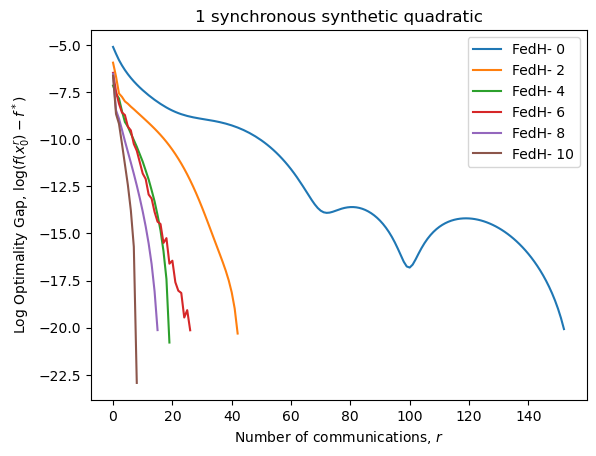

In [5]:
method,tuneAndDraw = prepare(10,10000)
ns=[0,2,4,6,8,10]
innerIterations = 1
df = tuneAndDraw.readPa(ns,innerIterations)
filename="./analyze data/analyze data/sync_and_async/1 synchronous synthetic quadratic node 10.pdf"
tuneAndDraw.draw(df,method.train_innerloop,"1 synchronous synthetic quadratic",filename,save = 0,asyn=0,possionBeta=[])

local datasizes
[0.09261055 0.07978388 0.0606847  0.02476883 0.12892062 0.15750799
 0.07542691 0.10736771 0.13284757 0.14008124]
[926, 797, 606, 247, 1289, 1575, 754, 1073, 1328, 1405]
initial_x [[0.]
 [0.]
 [0.]]
data int64
2.056115618043197e-09 54768 1
1.8681640609474748e-09 21450 1
2.056157868968178e-09 7507 1
1.6265380431423893e-09 6298 1
2.041840738153944e-09 6106 1
1.589698428450248e-09 1458 1


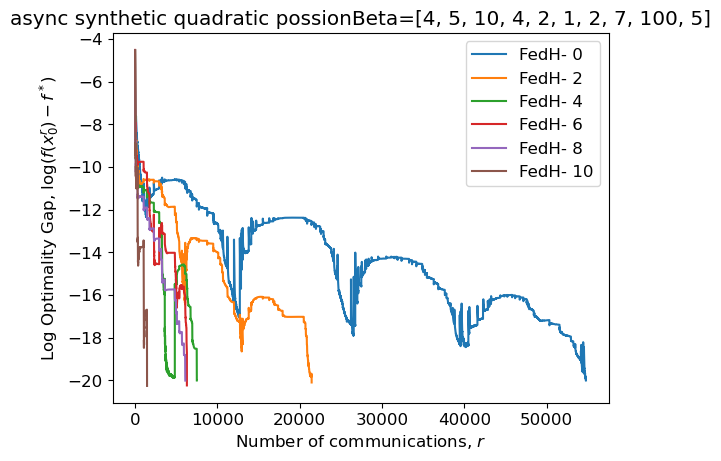

In [10]:
method,tuneAndDraw = prepare(10,10000)
ns=[0,2,4,6,8,10]
innerIterations = 1
df = tuneAndDraw.readPa(ns,innerIterations)
filename="./analyze data/analyze data/sync_and_async/1 asynchronous synthetic quadratic.pdf"

tuneAndDraw.draw(df,method.asynchronousTrain2,"async synthetic quadratic possionBeta=[4, 5, 10, 4, 2, 1, 2, 7, 100, 5]",filename,save=1,asyn=1,possionBeta = [4, 5, 10, 4, 2, 1, 2, 7,100,5])

local datasizes
[0.09261055 0.07978388 0.0606847  0.02476883 0.12892062 0.15750799
 0.07542691 0.10736771 0.13284757 0.14008124]
[926, 797, 606, 247, 1289, 1575, 754, 1073, 1328, 1405]
initial_x [[0.]
 [0.]
 [0.]]
data int64
2.0265689404386222e-09 39 1
1.2429110102241125e-09 22 1
1.2582614117295776e-09 17 1
4.831363017987478e-10 15 1
2.03957808975197e-10 9 1
1.1021152046541971e-10 8 1


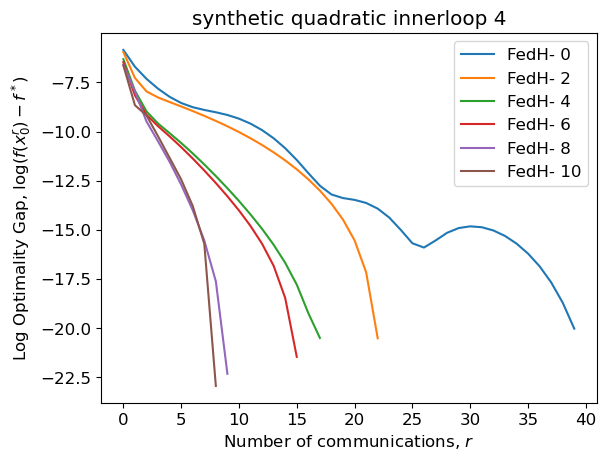

In [7]:
method,tuneAndDraw = prepare(10,10000)
ns=[0,2,4,6,8,10]
innerIterations =4
df = tuneAndDraw.readPa(ns,innerIterations)
filename="./analyze data/analyze data/sync_and_async/1 synthetic quadratic innerloop 4 before2.pdf"
tuneAndDraw.draw(df,method.train_innerloop_lambdaBefore,"synthetic quadratic innerloop 4",filename,save = 1,asyn=0,possionBeta=[])

In [33]:
method,tuneAndDraw = prepare(20,10000)
innerIterations =1

df=pd.read_csv('./analyze data/analyze data/setup1_node20_moreRoundsConverge.csv')
df.K=5000
runMore = tuneAndDraw.saveWithMoreRun(df,5000,method.train_innerloop_gradient_only)

local datasizes
[0.04710516 0.04058104 0.03086649 0.01259835 0.06557381 0.08011441
 0.03836493 0.0546112  0.06757121 0.07125052 0.06391568 0.03075995
 0.05396567 0.04842594 0.04621952 0.0109279  0.06274491 0.02756111
 0.07451685 0.07232535]
[471, 405, 308, 125, 655, 801, 383, 546, 675, 712, 639, 307, 539, 484, 462, 109, 627, 275, 745, 732]
initial_x [[0.]
 [0.]
 [0.]]


In [34]:
runMore.to_csv('./analyze data/analyze data/setup1_node20_moreRoundsConverge_return.csv',index=False)

In [12]:
nodes = [5,10,15,20]
datapoints=10000
for nclient in nodes:
    method,tuneAndDraw = prepare(nclient,datapoints)
    if nclient ==15:
        ns=[0,2,4,6,8,10,12,14,15]
    elif nclient == 20:
        ns =[0,2,4,6,8,10,12,14,16,18,20]
    elif nclient ==5:
        ns =[0]
    elif nclient ==10:
        ns =[0,2,4,6,8,10]
    inner=[1]
    setup=1   
    '''
    Best_pa_after_new = tuneAndDraw.tune(method,ns,inner,method.train_innerloop_lambdaAfter,'afterNew')
    Best_pa_after_new.to_csv('./setup_'+str(setup)+'_result/nodes2/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_afterNew'+'.csv',index=False)
    Best_pa_inner = tuneAndDraw.tune(method,ns,inner,method.train_innerloop,'inner')
    Best_pa_inner.to_csv('./setup_'+str(setup)+'_result/nodes2/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_inner'+'.csv',index=False)'''

    Best_pa_gra = tuneAndDraw.tune_save_all(method,ns,inner,method.train_innerloop_gradient_only,'gradient')
    
    #Best_pa_gra.to_csv('./setup_'+str(setup)+'_result/largeScale/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_gradient'+'_'+str(datapoints)+'.csv',index=False)
    

    #Best_pa_bef = tuneAndDraw.tune(method,ns,inner,method.train_innerloop_lambdaBefore,'before')
    now = datetime.now() # current date and time
    date_time = now.strftime("%m_%d_%Y, %H_%M")# month date year
 
    #Best_pa_after_new.to_csv('./setup_'+str(setup)+'_result/nodes/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_afterNew'+'.csv',index=False)
    #Best_pa_inner.to_csv('./setup_'+str(setup)+'_result/nodes/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_inner'+'.csv',index=False)
    Best_pa_gra.to_csv('./setup_'+str(setup)+'_result/largeScale_10000_original/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_gradient'+'.csv',index=False)
    #Best_pa_bef.to_csv('./setup_'+str(setup)+'_result/largeScale/'+'tune_result'+'_'+date_time+'_'+'node_'+str(nclient)+'_before'+'_'+str(datapoints)+'.csv',index=False)


local datasizes
[0.23944693 0.20628326 0.15690183 0.06404045 0.33332754]
[2394, 2062, 1569, 640, 3335]
initial_x [[0.]
 [0.]
 [0.]]
5
5   0 :  [4, 3, 2, 1, 0, -1, -2] [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10] [0] [0] [-8, -7, -6, -5, -4, -3, -2, -1, 0] 1000 []
client_gradient [0 1 2 3 4]
client_newton []
<bound method FedHybrid.train_innerloop_gradient_only of <fedhybrid_innerloops.FedHybrid object at 0x7faa0e54deb0>> nclient 5
a_range [4, 3, 2, 1, 0, -1, -2] b_range [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10] a2_range [0] b2_range [0] mu_range [-8, -7, -6, -5, -4, -3, -2, -1, 0] newton_client []
5
5   1 :  [4, 3, 2, 1, 0, -1, -2] [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10] [0] [0, -1, -2, -3, -4, -5, -6] [-8, -7, -6, -5, -4, -3, -2, -1, 0] 1000 [0]
client_gradient [1 2 3 4]
client_newton [0]
<bound method FedHybrid.train_innerloop_gradient_only of <fedhybrid_innerloops.FedHybrid object at 0x7faa0e54deb0>> nclient 5
a_range [4, 3, 2, 1, 0, -1, -2] b_range [0, -1, -2, -3, -4, -5, -

KeyboardInterrupt: 